In the previous file we've learned how textual data is represented in a computer. So far we have only encoded and decoded data that was contained inside string variables. However, in practice, data is usually stored in files. In this file, we are going to apply what we have learned to read and write data into files.

We have already learned how to read files using the [`open()` built-in function](https://docs.python.org/3/library/functions.html#open). Here we will build on that knowledge and learn more about this function. We will also learn how to write data into a file.

As we have learned in the previous file, textual data is represented internally using bytes. The bytes that are used depend on the encoding that is used when writing or reading the file. If no encoding is specified then Python will use the default encoding used by the operating system.

This encoding can be accessed using the [`locale.getpreferredencoding()` function](https://docs.python.org/3.6/library/locale.html#locale.getpreferredencoding) from the [`locale` module](https://docs.python.org/3.6/library/locale.html). This encoding may vary from system to system but it is often UTF-8:

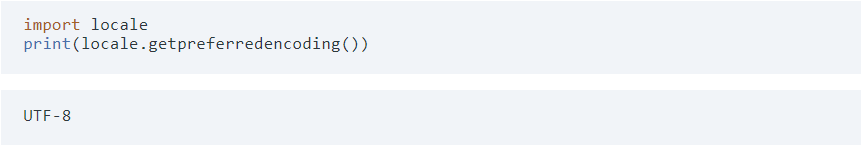

In [1]:
import locale
print(locale.getpreferredencoding())

cp1252


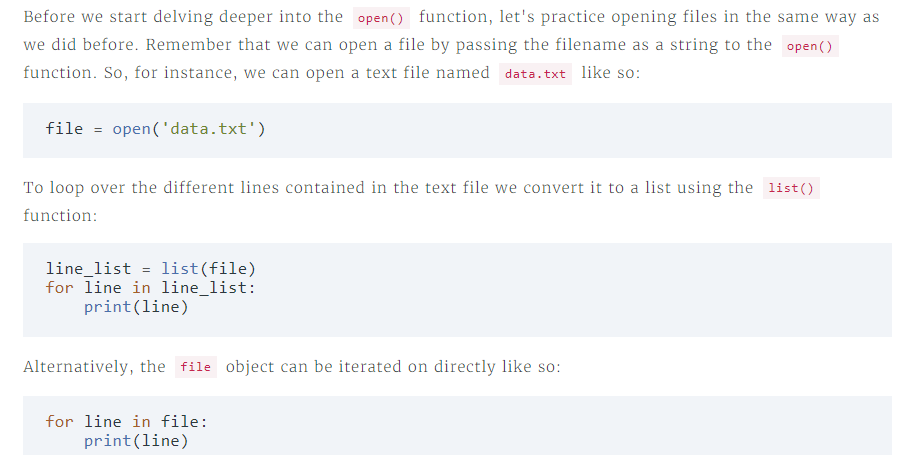

It is important to always close a file after writing or reading from it. The reason for this is that having a file opened uses resources that may become locked, preventing other programs from using them. Furthermore, when writing to a file, we can lose data if we do not properly close the file. We can close a file using the [`file.close()` method](https://docs.python.org/2/library/stdtypes.html?highlight=close#file.close).

Before we delve deeper into reading files using different encodings, let's learn how to read a file using an alternative syntax. This alternative syntax for reading files looks something like this:

`with open('data.txt') as file:
    for line in file:
        print(line)`
        
This might seem like a strange way of doing things at first, but we will see that it is actually a very convenient way of reading files and often considered a best practice. This way of reading a file is known as a reading a file with a **context manager**.

We can think of doing:

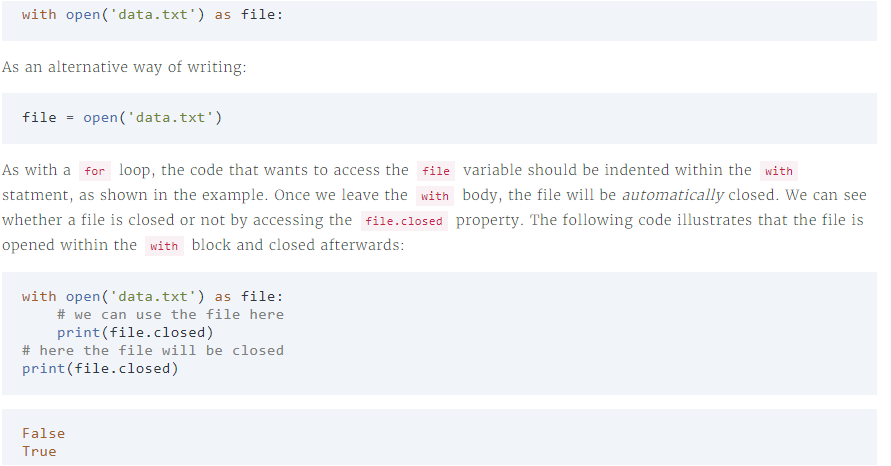

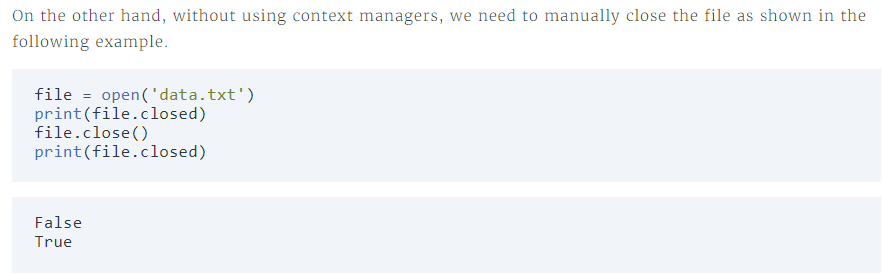

Using this syntax is recommended, because it automatically closes the file; therefore, avoids the risk of forgetting to do it. From now on, we will use this syntax to open files.

`with open('dialog.txt') as file:
    lines = list(file)`

We are going to learn how to read files using different encodings. In particular, we are interested in file `kyoto_restaurants.csv` which contains a listing of restaurants in Kyoto, Japan.

Here are the first we rows contained in it:

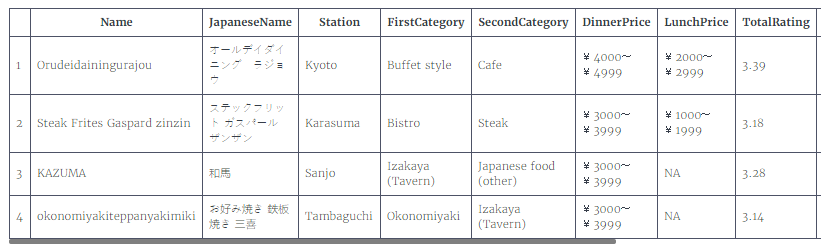

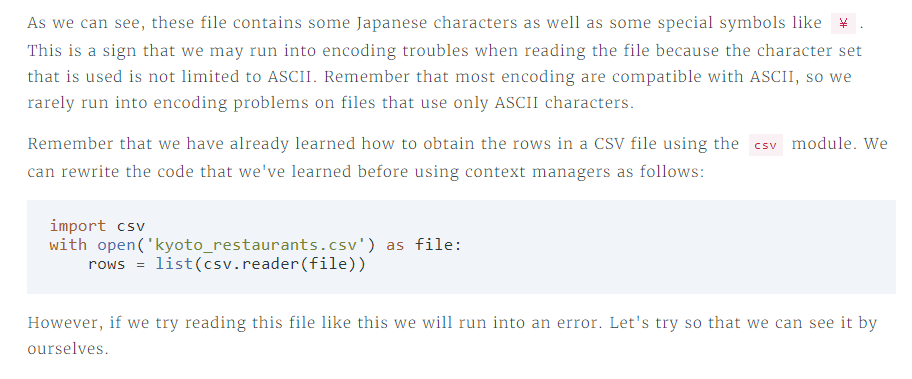

**Task**

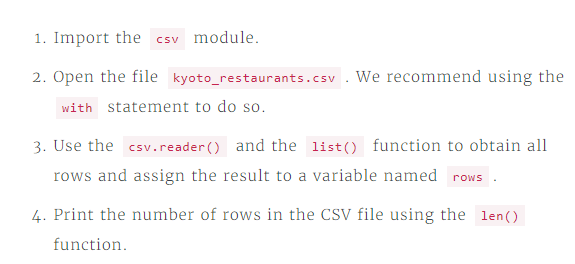

**Answer**

In [2]:
import csv
with open('kyoto_restaurants.csv') as file:
    rows = list(csv.reader(file))
    print(len(rows))

UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 1445: character maps to <undefined>

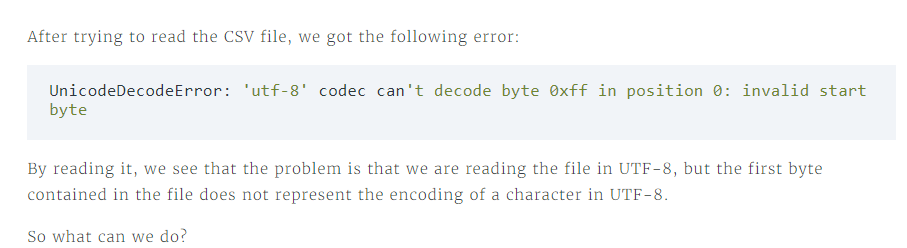

In the last file, we have learned that the [`chardet` module](https://chardet.readthedocs.io/en/latest/usage.html) can help us detect the encoding of a sequence of bytes. However, we need to have the sequence of bytes, yet we were not even able to read the file. So, how can we obtain these bytes?

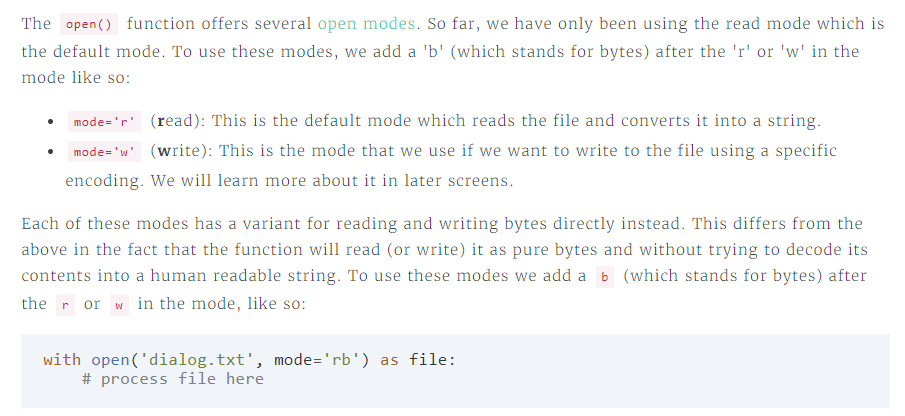

When we open the file in the `rb` mode, we obtain a [`BufferedReader` object](https://docs.python.org/3/library/io.html#io.BufferedReader). We can see in the documentation that we can get the bytes by using the `BufferedReader.read()` function. Here is how:

`with open('dialog.txt', mode='rb') as file:
    raw_bytes = file.read()`
    
Ok, so we are now able to read a file as a `bytes` object. If we remember from the previous file, we can pass that bytes object into the `chardet.detect()` function to try to idetify which encoding these bytes correspond to:

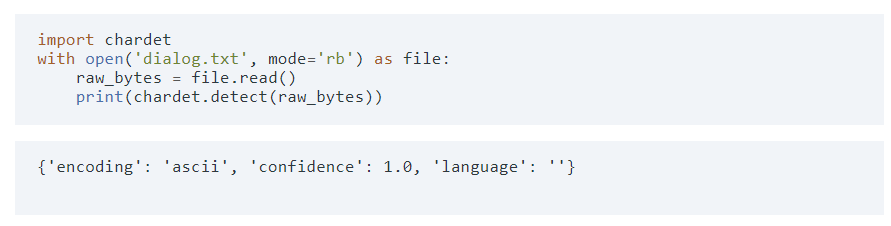

**Task**

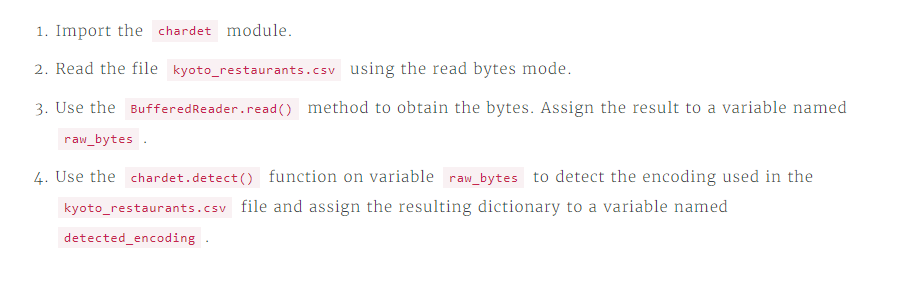

**Answer**

In [4]:
import chardet
with open('kyoto_restaurants.csv', mode='rb') as file:
    raw_bytes = file.read()
    detected_encoding = chardet.detect(raw_bytes)
    print(detected_encoding)

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}


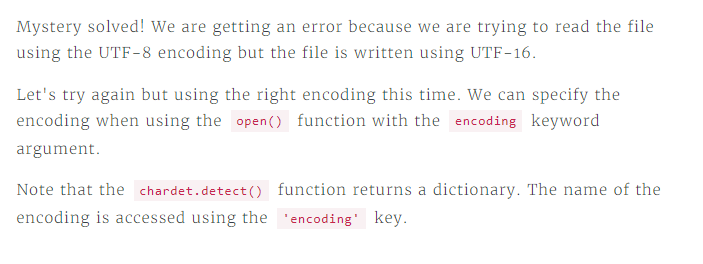

**Task**

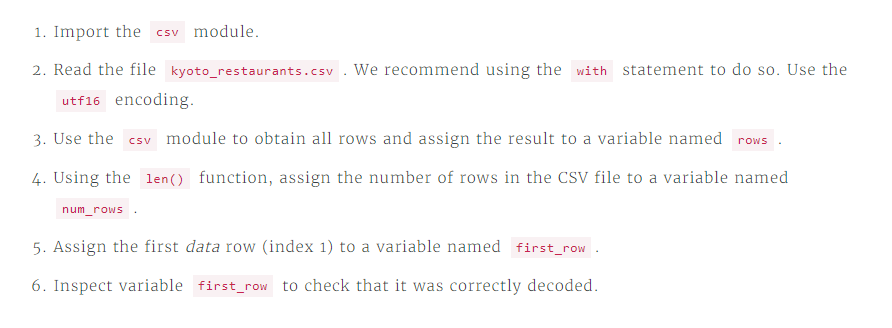

**Answer**

In [5]:
import csv
with open('kyoto_restaurants.csv', encoding='utf16') as file:
    rows = list(csv.reader(file))
    num_rows = len(rows)
    first_row = rows[1]

In practice we should avoid trying to guess the encoding of a file whenever possible. If we know the source of the file, we should ask there what encoding was used. This is more likely to get us accurate results. However, we don't always know the source of the data. In these cases this workflow is an alternative solution.

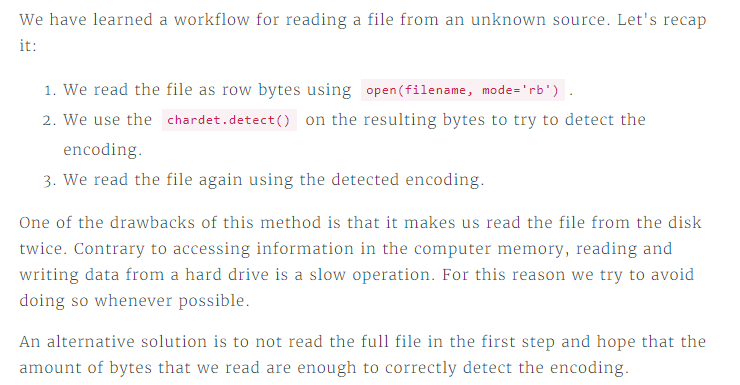

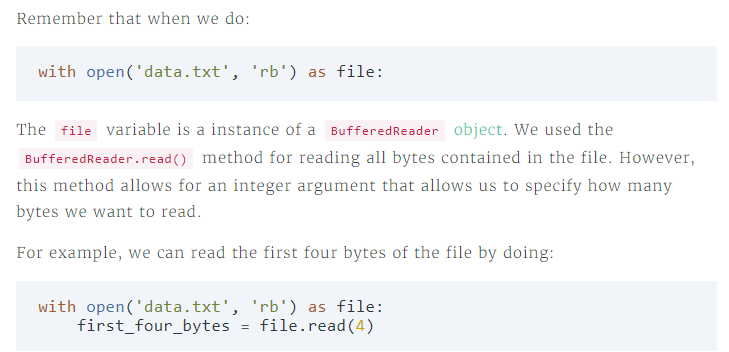

Note that the number of bytes that we read can impact the result of `chardet.detect()`. For example, with our Kyoto restaurants data, if we read only one single byte we get an encoding other than UTF-16:

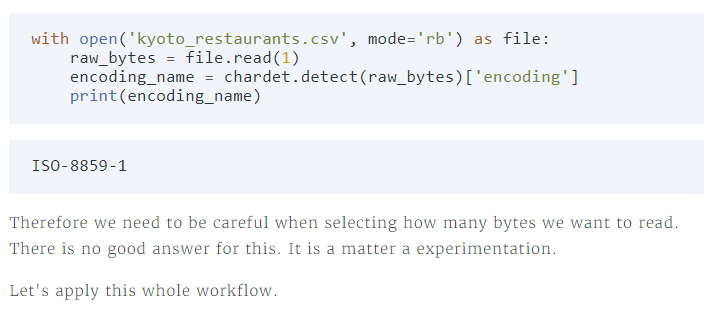

**Task**

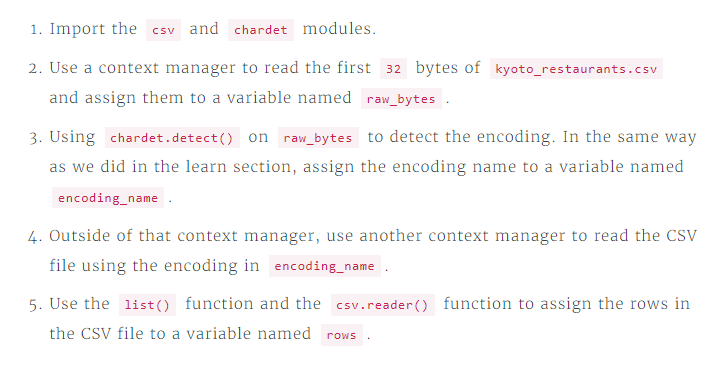

**Answer**

In [6]:
import csv
import chardet

with open('kyoto_restaurants.csv', mode='rb') as file:
    raw_bytes = file.read(32)
    encoding_name = chardet.detect(raw_bytes)['encoding']
    
with open('kyoto_restaurants.csv', encoding=encoding_name) as file:
    rows = list(csv.reader(file))

We have now learned how to read files and take encodings into account.

We are now going to learn how to write into files. We have already mentioned briefly that the `open()` mode provides a mode for writing. This is done by passing a `w` to the mode argument:

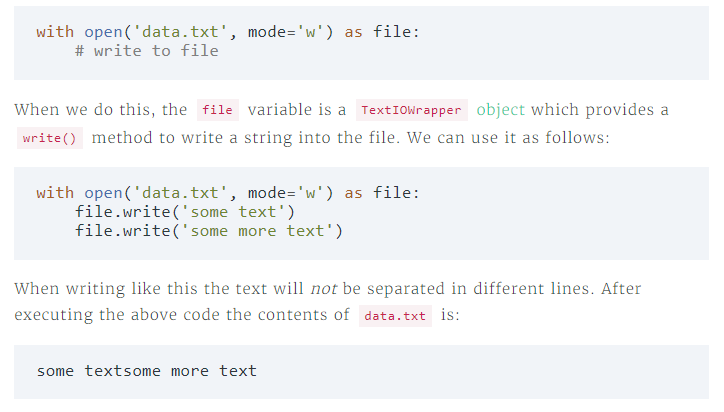

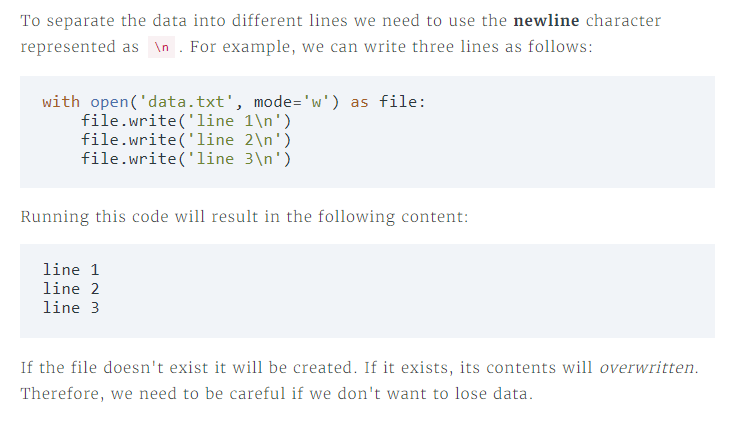

The method to write to a file that we've learned above will overwrite the original contents of the file (or create it if it did not exist). What if we want to add data to an existing file without erasing its current contents?

As we may have guessed, the `open()` function also provides an append option for doing this: `mode='a'`. It is used exactly as the write mode:

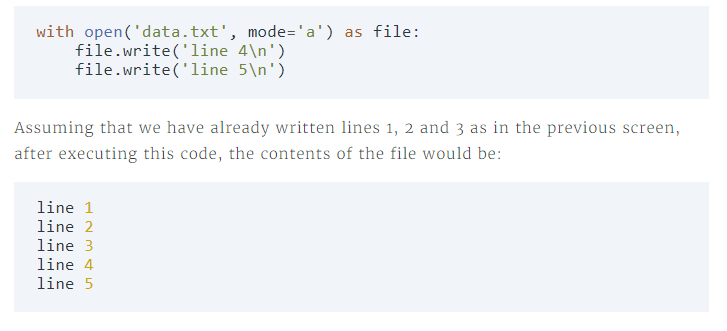

In general it is more convenient to work with UTF-8 files since very often this is the default encoding used by Python. We learned in the previous file that UTF-16 might save us some space when compared to UTF-8 when we are dealing with non-European languages. However in this case the amount of non-European data is minimal so it does not really matter.

Unless we really see a big difference in storage space, it will make our life easier to stick with UTF-8.

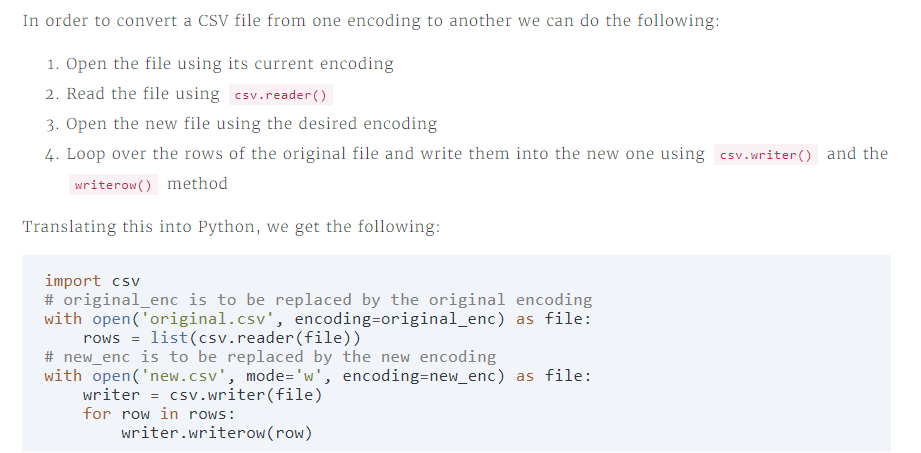

**Task**

Use the workflow that you have learned above to convert the CSV file `kyoto_restaurants.csv` from UTF-16 to UTF-8. The new file should be named `kyoto_restaurants_utf8.csv`.

**Answer**

In [7]:
import csv

with open('kyoto_restaurants.csv', encoding='UTF-16') as file:
    rows = list(csv.reader(file))
    
with open('kyoto_restaurants_utf8.csv', mode='w', encoding='UTF-8') as file:
    writer = csv.writer(file)
    for row in rows:
        writer.writerow(row)

In this file we learned how read and write files using the appropriate encodings. We have learned how to use context managers for opening files which makes it not necessary for us to manually close files once we are done working on them.

We have also learned two important workflows:

1. How to identify the encoding of a file
2. How to convert a file from one encoding to another